# Human Activities - Classification

### *Adrien BERSIER, Nicolas HUBERT*

Pour ce TP nous allons mettre en pratique plusieurs méthodes de classification supervisée sur des données d'enregistrement d'acceleromètres (de smart-phones).

Les données sources sont disponibles sur [le site de l'UCI](http://bertrand.michel.perso.math.cnrs.fr/Enseignements/Data/UCI-HAR-Dataset.zip)

"The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain. See 'features_info.txt' for more details."




In [1]:
%matplotlib inline
from pylab import *
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing 

# Importation des données


Les suivants permettent de récupérer les données.
Pour simplifier on n'utilise pour le TP que les données du dossier train.

In [2]:
votre_path= "C:/Users/acer/Documents/GitHub/S2D-Centrale/UCI HAR Dataset/"

#### recuperations des features

In [3]:
data_path = votre_path + "features.txt"
features_names =    pd.read_csv(data_path,delim_whitespace=True,header=None)

data_path = votre_path + "train/X_train.txt"
activity_features = pd.read_csv(data_path,delim_whitespace=True,
                                header=None,names=features_names.values[:,1])

C:\Users\acer\Anaconda3\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


#### recuperations des activités :

In [4]:
data_path = votre_path + "train/y_train.txt"
activity  =    pd.read_csv(data_path,delim_whitespace=True,header=None)
activity  =  activity.values[:,0] -  1
activity_names = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']
activity

array([4, 4, 4, ..., 1, 1, 1], dtype=int64)

#### recuperations des sujets :

In [5]:
data_path = votre_path + "train/subject_train.txt"
sujet =  pd.read_csv(data_path,delim_whitespace=True,header=None)
sujet =sujet.values[:,0]

> Effectuer une standardisation des features (activity_features) avec la fonction  [StandardScaler()](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) de scikit-learn.

In [6]:
# from sklearn.preprocessing import StandardScaler
# scaler = preprocessing.StandardScaler()
# features_nor = scaler.fit_transform(activity_features)
# features_nor

In [7]:
features_nor = preprocessing.scale(activity_features)
features_nor

array([[ 0.20064157, -0.0636826 , -0.41962845, ..., -0.68721921,
         0.40794614, -0.00756789],
       [ 0.05594788,  0.03148567, -0.25390836, ..., -0.694138  ,
         0.40911698,  0.00787517],
       [ 0.07351535, -0.04341648, -0.07629468, ..., -0.702239  ,
         0.4102883 ,  0.02650234],
       ...,
       [-0.01566765,  0.0167814 ,  1.13222107, ..., -0.56584847,
         0.64059683,  0.34870928],
       [ 0.21586648, -0.02812252, -0.86770988, ..., -0.57766781,
         0.63147758,  0.29327564],
       [ 1.09620157,  0.12919873, -1.67268082, ..., -0.57392691,
         0.63274259,  0.33396081]])

# ACP des données activity_features

> Tracer le nuage des deux premières composantes de l'ACP en distinguant les 5 activités pour constater qu'il y a beaucoup de recouvrement entre les classes sur ces deux premières composantes. Un descriptif de la fonction `sklearn.decomposition.PCA()` de la librairie scikit-learn est disponible [ici](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


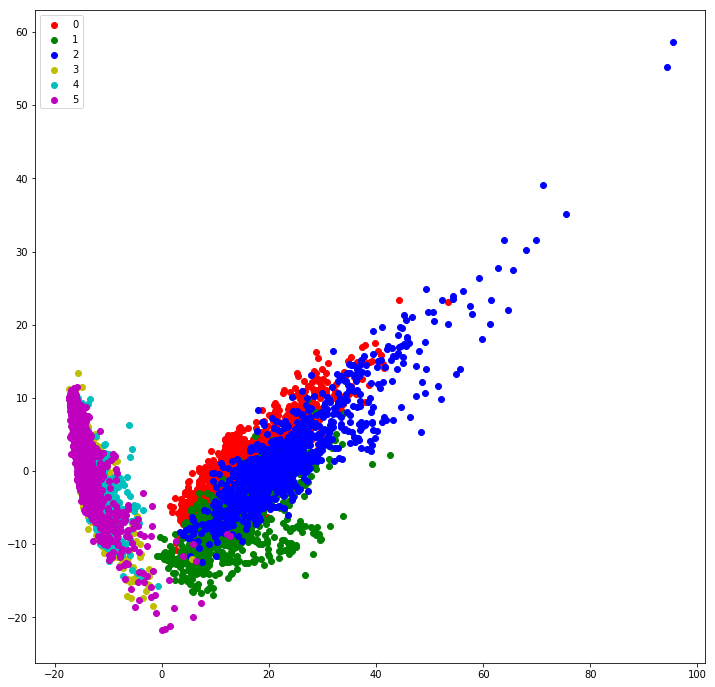

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
print(pca)

pca.fit(features_nor)
DataExtract = pca.transform(features_nor) # Ou fit_transform directement

ACP0 = DataExtract[:,0]
ACP1 = DataExtract[:,1]

plt.figure(figsize=(12, 12))
for c, i, act in zip("rgbycm", range(0,6),range(0,6)):
    plt.scatter(ACP0[activity==i],ACP1[activity==i], c=c, label=act)
# iterer sur les activités et utiliser un zip pour
# faciliter la representation graphique des objets 
# sur lesquels on itere
plt.legend()

# Problème de classification à deux classes

Dans toute la première partie du TP, on considère un problème de classification à deux classes. 

> Extraire les donnnés pour les activités  3 et 4 uniquement. On appelera `features34` et `activity34` les données correspondantes.

In [9]:
n,p = shape(features_nor)
index_act34 = [i for i in range(n) if activity[i]==3 or activity[i]==4] 
activity34 = activity[index_act34]
features34 = features_nor[index_act34,:]
print(shape(features34))

(2660, 561)


# Présélection de features  pour réduire la dimension (screening)

Pour diminuer les temps de calul on peut pré-sélectionner les 100 features les plus discriminants via un critère unvarié. 

> Utiliser le critère  [SelectKBest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) basé sur la F-value (variance inter / variance intra).

Attention, cette méthode ne garantit en rien que l'on a choisi le "meilleur" groupe de 100 variables pour le problème de classification.

In [10]:
from sklearn.feature_selection import SelectKBest, f_classif
Selec = SelectKBest(f_classif, k=100)
features34 = Selec.fit_transform(features34, activity34)
print(shape(features34))
features34

(2660, 100)


array([[ 1.10007176e+00,  1.38089495e+00,  1.89952314e+00, ...,
        -6.87219211e-01,  4.07946135e-01, -7.56788537e-03],
       [ 5.51490063e-01,  3.07608575e-01,  3.65782382e-01, ...,
        -6.94137995e-01,  4.09116983e-01,  7.87517067e-03],
       [ 1.68551367e-01,  1.19019296e-03,  3.83495707e-02, ...,
        -7.02239005e-01,  4.10288301e-01,  2.65023352e-02],
       ...,
       [ 1.11713514e+00,  3.06721140e-01,  1.75934348e-02, ...,
        -4.83903364e-01,  7.54517344e-02, -4.14398080e-01],
       [ 1.09089808e+00, -9.23908493e-02,  2.18715554e-01, ...,
        -4.78286039e-01,  7.21272146e-02, -4.21484382e-01],
       [ 1.16432356e+00, -1.67172925e-03, -3.36305122e-01, ...,
        -4.78540215e-01,  7.23500145e-02, -4.21171415e-01]])

# Ajustement pour des méthodes classiques d'apprentissage

> Pour chacune des méthodes de classificiation listées ci-dessous, construire un predicteur de l'activité en utilisant comme données d'apprentissage la base (features34,activity34) :      
- Classifieur naif bayesien avec la fonction `GaussianNB()`   
- Classifieur des k plus proches voisins avec `neighbors.KNeighborsClassifier()  `  
- Classifieur par régression logistique, avec pénalisation ridge puis avec une pénalisation lasso, en utilisant la fonction `linear_model.LogisticRegression() `  


Une présentation de chacune des ces fonction est accessible depuis cette [page](http://scikit-learn.org/stable/user_guide.html).
</p>

In [11]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB()
y_pred_gnb = gnb.fit(features34, activity34).predict(features34)
y_pred_gnb

array([3, 3, 4, ..., 3, 3, 3], dtype=int64)

In [12]:
from sklearn import neighbors
n_neighbors = 5
weights = 'uniform'
nn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
y_pred_nn = nn.fit(features34, activity34).predict(features34)
y_pred_nn

array([4, 4, 4, ..., 3, 3, 3], dtype=int64)

In [13]:
from sklearn import linear_model
logit =  linear_model.LogisticRegression()
y_pred_logit = logit.fit(features34,activity34).predict(features34)
y_pred_logit

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([4, 4, 4, ..., 3, 3, 3], dtype=int64)

# Evaluation de l'erreur avec un découpage train / test

> Estimer les performances de classification sur l'échantillon d'apprentissage conduit à sous-estimer systématiquement l'erreur de généralisation du prédicteur construit. Calculer l'erreur estimée sur les données d'apprentissage.

In [14]:
from sklearn.metrics import accuracy_score
print("Précision :")
for ypred, method in zip([y_pred_gnb, y_pred_nn, y_pred_logit],["Naive Bayes","KNN","Logistic Regression"]):
    print(method, ":", accuracy_score(activity34,ypred))

Précision :
Naive Bayes : 0.8056390977443609
KNN : 0.9609022556390977
Logistic Regression : 0.9590225563909774


On peut contourner ce problème de surapprentissage systématique en utilisant un ensemble de validation. Pour cela on considère deux échantillons :

- l'ensemble d'apprentissage : utilisé pour construire des prédicteurs ;
- l'ensemble de test : utilisé pour évaluer les performances des prédicteurs.

> Utiliser la fonction <code>train_test_split</code>  du module [<code> model_selection</code>](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) pour construire un échantillon d'apprentissage de taille 60% (et donc 40% réservées aux données de test)

In [15]:
from sklearn import model_selection

features_train, features_test, activity_train, activity_test = model_selection.train_test_split(features34, activity34, 
                                                                                                test_size=0.4)
print(len(activity_train)/ float(len(activity34)))
print(len(activity_test)/ float(len(activity34)))
print(shape(features_test))
 

0.6
0.4
(1064, 100)


> Evaluer le risque d'un classifieur par plus proches voisins sur ce découpage des données :

In [16]:
nn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
y_pred_nn_bis = nn.fit(features_train, activity_train)
predictions_nn = nn.predict(features_test)
print("Précision : ", accuracy_score(activity_test,predictions_nn))

Précision :  0.9125939849624061


> Reproduire la procédure 100 fois et dresser le boxplot de l'estimation de l'erreur sur ces 100 runs.

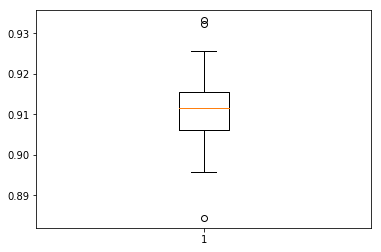

In [17]:
score_train_test = [] # pour stockage des scores
for simu in range(100) :
    features_train, features_test, activity_train, activity_test = model_selection.train_test_split(features34, activity34, 
                                                                                                test_size=0.4)
    nn_train_test = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    predic_nn = nn_train_test.fit(features_train, activity_train).predict(features_test)
    score_train_test.append(accuracy_score(activity_test,predic_nn))
B = plt.boxplot(score_train_test)

> Tracer la courbe d'erreur du classifieur par plus proches voisins en fonction du nombre de voisins utilisés (de 1 à 15), en utilisant cette méthode de découpage train / test répétée 20 fois.

In [19]:
mean_score = np.zeros(15)
for k in range(1,16):
    score_train_test = [] # pour stockage des scores
    for simu in range(10) :
        features_train, features_test, activity_train, activity_test = model_selection.train_test_split(features34, activity34, 
                                                                                                test_size=0.4)
        nn_train_test = neighbors.KNeighborsClassifier(k, weights=weights)
        predic_nn = nn_train_test.fit(features_train, activity_train).predict(features_test)
        score_train_test.append(accuracy_score(activity_test,predic_nn))
    mean_score[k-1] = np.mean(score_train_test)
        
    

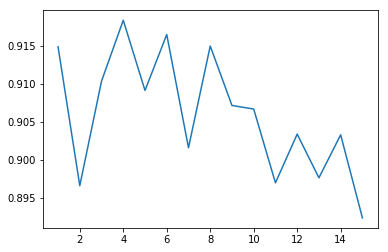

In [20]:
plt.plot(range(1,16),mean_score)

# Estimation du risque par validation croisée 

Le principal défaut de l'approche par train/validation/test est qu'elle demande un grand
volume de données. En pratique, on lui préfère en général une méthode de
validation croisée, même si cette deuxième approche a le défaut d'être plus coûteuse en temps de
calcul. On présente ci-dessous la méthode du de validation croisée de type **k-fold**.

L'idée principale de la méthode est de faire jouer à chaque observation à la fois le rôle de donnée d'apprentissage et celui de donnée de validation. 

Le principe consiste à partitionner aléatoirement les données $D=(\mathbf{x}_i,y_i)_{1\leq i\leq N} $ 
en $K$ blocs disjoints de tailles comparables :
$D^1,\ldots,D^K$. On prend généralement $K=5$ ou $10$. La méthode du **leave-one-out (Loo)** correpond au choix $K=N-1$. 

On estime alors la qualité d'un type de predicteur de la
façon suivante :
- pour tout $k \in \{1,\dots, K\}$, on construit un predicteur $\hat f^k$ sur l'ensemble d'apprentissage $D^{-k} := D\setminus D^k$ ;
- on calcule le risque empirique de $\hat f^k$ par
$$
\frac{1}{N}\sum_{k=1}^K\sum_{\mathbf{x}_i\in D^k} \ell(f^k(\mathbf{x}_i),y_i),
$$
où $\ell$ est la perte utilisée.

En d'autres termes, on construit autant de prédicteurs qu'il y a de blocs dans
l'ensemble d'apprentissage. Chaque prédicteur est évalué sur les éléments du
bloc qui n'a pas vu en apprentissage (et qui joue donc le rôle d'un
ensemble de validation). 

Lorsque l'on souhaite régler un paramètre en utlisant la validation croisée, par exemple le nombre de voisins $k$ pour knn, on procède comme suit :
- on évalue les performances des prédicteurs via le risque empirique calculé sur le bloc hors apprentissage, comme expliqué ci-dessus ;
- on détermine la valeur optimale du paramètre ;
- on construit finalement un predicteur pour le paramètre sélectionné, en utilisant comme base d'apprentissage toutes les données.


**Comparaison entre LOO et methodes k folds, quelques repères :** 
- LOO a un coût computationnel plus élevé que les méthodes k-fold pour k petit (pour k = 5 ou 10 par exemple)
- L'estimation de l'erreur fournie par LOO a généralement une variance plus élevée que celles obtenues par un k-fold pour k petit.
- En revanche, si l'erreur de classification décroit très rapidement avec $n$, les méthodes k-fold avec k petit peuvent surestimer significativement l'erreur de généralisation.
- En général, il est souvent recommandé d'utiliser les méthodes k-fold avec k = 5 ou 10.

###  Estimation de l'erreur par 10-fold :

In [21]:
nn_val_croisee = neighbors.KNeighborsClassifier(n_neighbors = 10)
scores = model_selection.cross_val_score(nn_val_croisee, features34, activity34, cv=10)
print(scores)
print(mean(scores))

[0.90636704 0.83520599 0.85018727 0.81273408 0.88345865 0.80451128
 0.91320755 0.95849057 0.84150943 0.88679245]
0.8692464306834502


###  Estimation de l'erreur par Loo


> Utiliser la fonction <code>LeaveOneOut</code> de `model_selection pour évaluer l'erreur du classifieur de plus proche voisin (pour 10 voisins).



In [ ]:
# from sklearn.model_selection import LeaveOneOut
# loo = LeaveOneOut()
# score_train_test = [] # pour stockage des scores
# for train_index, test_index in loo.split(features34):
#     nn_loo = neighbors.KNeighborsClassifier(n_neighbors = 10)
#     predic_nn = nn_loo.fit(features34[train_index], activity34[train_index]).predict(features34[test_index])
#     score_train_test.append(accuracy_score(activity34[test_index],predic_nn))

In [22]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
nn_val_croisee = neighbors.KNeighborsClassifier(n_neighbors=10)
scores = model_selection.cross_val_score(nn_val_croisee, features34, activity34, cv=loo)
mean(scores)

0.9278195488721804

## Sélection du nombre de plus proches voisins par validation croisée 10 fold

> Selectionner un nombre de voisins pour le classifieur de plus proches voisins par validation 10 fold.

In [43]:
scores=[]
best_param = 2
best_score = 0
for n_neigh in range(2,20):
    nn_val_croisee = neighbors.KNeighborsClassifier(n_neighbors = n_neigh)
    score = model_selection.cross_val_score(nn_val_croisee, features34, activity34, cv=10)
    scores.append(score)
    if np.mean(score) > np.mean(best_score) :
        best_param = n_neigh
        best_score = score
print("Meilleur paramètre :", best_param)
    

Meilleur paramètre : 14


# La fonction GridSearchCV

En pratique, il est courant de devoir régler des paramètres par validation croisée. La fonction GridSearchCV permet d'effectuer cette tache de façon simple, en répartissant éventuellement les calculs sur plusieurs coeurs (voir plus bas).

In [23]:
from sklearn.model_selection import GridSearchCV
from time import time

# la grille de parametres a regler sont definis dans un dictionnaire (dict)
tuned_parameters = {'n_neighbors': range(2,20)}
start = time()
nnGrid = GridSearchCV(neighbors.KNeighborsClassifier(), tuned_parameters,
                      cv=5)
nnGrid.fit(features34, activity34)
print(str(time() - start)+ " sec")

# le meilleur modele 
print(nnGrid.best_params_)

236.7478392124176 sec
{'n_neighbors': 14}


# Classification multiclasses 

Nous allons maintenant nous intéresser au problème de la classification des 6 classes d'activité. Sauf précision, la perte utilisée est la perte de mauvais classement "sèche" (harsh metric).

## Présélection de features

Pour réduire les temps de calcul (il s'agit d'un TP...) nous appliquons la même stratégie de présélection de features que pour le cas à deux classes :

In [24]:
Selec = SelectKBest(f_classif, k=20)
features_all_activities = Selec.fit_transform(activity_features, activity)
shape(features_all_activities)

(7352, 20)

#### Classifieur naif bayesien multiclasses

In [31]:
from sklearn.model_selection import cross_val_score
gnb = GaussianNB()
scores  = cross_val_score(gnb, features_all_activities, activity, cv=10)
print(scores)
print(mean(scores))

[0.84552846 0.71138211 0.80487805 0.69742198 0.83559783 0.67934783
 0.71077763 0.66393443 0.84016393 0.77459016]
0.756362240184805


#### Classifieur des k plus proches voisins multiclasses

In [33]:
nn = neighbors.KNeighborsClassifier(n_neighbors = 4, weights="uniform")
scores  = cross_val_score(nn, features_all_activities, activity, cv=10)
print(scores)
print(mean(scores))

[0.81436314 0.81165312 0.81165312 0.76390773 0.75407609 0.79891304
 0.78171896 0.81693989 0.86338798 0.82786885]
0.8044481925662087


> Utiliser la fonction GridSearchCV pour choisir le nombre de voisin pour l'estimateur knn dans ce cas multiclasses. Ajuster le modèle finalement choisi sur la base d'apprentissage et dresser la matrice de confusion.

In [35]:
tuned_parameters = {'n_neighbors': range(2,20)}
start = time()
nnGrid = GridSearchCV(neighbors.KNeighborsClassifier(), tuned_parameters,
                      cv=5)
nnGrid.fit(features_all_activities, activity)
print(str(time() - start)+ " sec")

# le meilleur modele 
print(nnGrid.best_params_)

64.07361841201782 sec
{'n_neighbors': 17}


In [38]:
from sklearn.metrics import confusion_matrix
best_param = 17
nn = neighbors.KNeighborsClassifier(n_neighbors = best_param)
features_train, features_test, activity_train, activity_test = model_selection.train_test_split(features_all_activities,
                                                                                                activity, 
                                                                                                test_size=0.4)
nn_train_test = neighbors.KNeighborsClassifier(best_param, weights=weights)
predic_nn = nn_train_test.fit(features_train, activity_train).predict(features_test)
confusion_matrix(activity_test, predic_nn)

array([[497,   8,  10,   0,   0,   0],
       [  5, 427,   6,   0,   0,   0],
       [  4,  36, 357,   0,   0,   0],
       [  0,   0,   0, 326, 179,   0],
       [  0,   0,   0,  93, 437,   0],
       [  0,   0,   0,   0,   0, 556]], dtype=int64)

# Regression logistique Lasso

> Ajuster et évaluer un modèle logistique Lasso sur les données avec la fonction [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

In [51]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=5, random_state=0, multi_class='multinomial').fit(features_all_activities, activity)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

In [52]:
clf.score(features_all_activities, activity) 

0.8979869423286181